# Übungsaufgabe Zylinder

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gl/sgeorg%2Fpython-thermo/HEAD?filepath=%C3%9Cbung-Zylinder.ipynb)

Ein mit einem idealen zweiatomigen Gas (z.B. Stickstoff) gefüllter, geschlossener Zylinder mit definiertem Volumen soll von einem *Ausgangszustand 1* (T = 20 °C, p = 1 bar, V = 10 L) komprimiert/entspannt werden. Die Zustandsänderung soll

* Isentrop
* Isotherm
* Isochor

zu einem neuen Druckniveau $p_{end}$ ablaufen. Zu berechnen sind die jeweiligen *Endzustände* (Temperatur und Volumen) und Prozessgrößen (Entropie, Wärme und Arbeit), das Ergebnis ist in ein p-V- und ein T-S-Diagramm einzutragen. Das Gas habe den Isentropenexponent $\kappa = 1,4$ und eine spezifische Gaskonstante $R_i = 287 \frac{J}{kg \cdotp K}$.

Der Enddruck kann über den Regler *p_end* zwischen 0,1 und 10 bar eingestellt werden.

**Beim erstmaligen starten bitte im Menü auf *Kernel->Restart & Run All* gehen.**

## Setup

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plot
from ipywidgets import FloatSlider, interact
from IPython.display import Latex

# Diagrammachsen automatisch anpassen? (True/False)
autoscale = False

# Eigenschaften des Fluids
κ = 1.4
Ri = 287
cp = Ri * κ / (κ - 1)
cv = cp - Ri

# Ausgangszustand (1)
p1 = 1e5    # 1 bar
T1 = 293.15 # 20 °C
V1 = 10e-3  # 10 L
m = (p1 * V1) / (Ri * T1)

## Festlegen des Enddrucks

In [2]:
p_end_slider = FloatSlider(10, min=0.1, max=10, step=0.1)
p_end_slider

FloatSlider(value=10.0, max=10.0, min=0.1)

## p-V-Diagramm

<IPython.core.display.Javascript object>


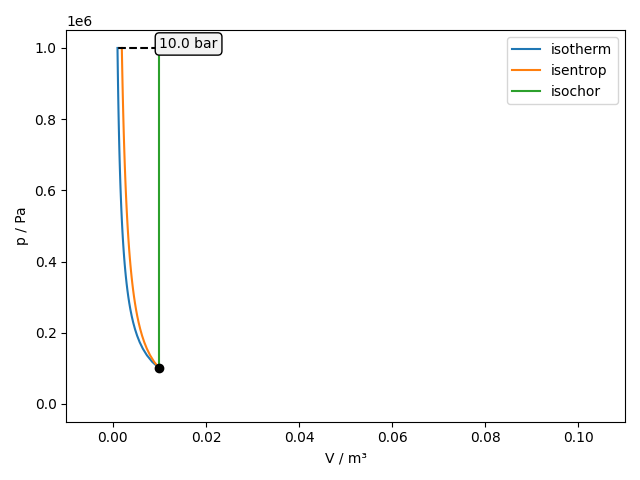

interactive(children=(FloatSlider(value=10.0, description='p_end', max=10.0, min=0.1), Output()), _dom_classes…

In [3]:
# Hilfsfunktionen
def V(p, n): return V1 * ((m * Ri * T1) / (p * V1)) ** (1 / n) if n > 0 else np.full(p.shape, V1)
def p2(): return 1e5 * p_end_slider.value
def V2_max(): return V(p2(), 1)
def ϑ(T): return T - 273.15

# Allgemeine Einstellungen für Beschriftungen
text_config = {'bbox': {'boxstyle': 'round', 'fc': '0.95'}}

# Achsendefintion
pp = np.linspace(p1, p2())

# p-V-Diagramm
pv, ax_pv = plot.subplots()
pv_isotherm, = ax_pv.plot(V(pp, 1), pp, label='isotherm')
pv_isentrop, = ax_pv.plot(V(pp, κ), pp, label='isentrop')
pv_isochor, =  ax_pv.plot(V(pp, 0), pp, label='isochor')
ax_pv.plot(V1, p1, 'ko')
pv_isobar, = ax_pv.plot([V1, V2_max()], [p2(), p2()], 'k--')
pv_text = ax_pv.annotate(f'{p2()/1e5} bar', (V1, p2()), **text_config)
ax_pv.set_xlabel('V / m³')
ax_pv.set_ylabel('p / Pa')
ax_pv.legend()
if not autoscale:
    ax_pv.set_xlim(-0.01, 0.11)
    ax_pv.set_ylim(-5e4, 1.05e6)
pv.tight_layout()

# Interaktiver Regler für den Enddruck p2
@interact
def pv_update(p_end=p_end_slider):
    pp = np.linspace(p1, p2())
    pv_isotherm.set_xdata(V(pp, 1))
    pv_isotherm.set_ydata(pp)
    pv_isentrop.set_xdata(V(pp, κ))
    pv_isentrop.set_ydata(pp)
    pv_isochor.set_xdata(V(pp, 0))
    pv_isochor.set_ydata(pp)
    pv_isobar.set_xdata([V1, V2_max()])
    pv_isobar.set_ydata([p2(), p2()])
    pv_text.set_text(f'{p2()/1e5} bar')
    pv_text.set_y(p2())
    if p2() < p1:
        pv_text.set_ha('right')
    else:
        pv_text.set_ha('left')    
    if autoscale:
        ax_pv.relim()
        ax_pv.autoscale_view()
    pv.show()

## T-S-Diagramm

<IPython.core.display.Javascript object>


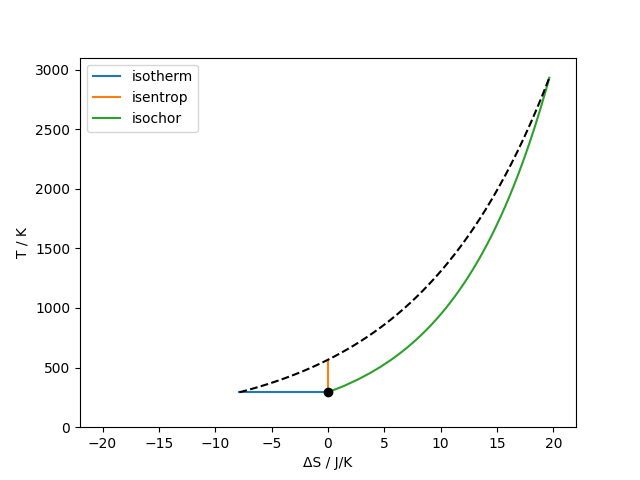

interactive(children=(FloatSlider(value=10.0, description='p_end', max=10.0, min=0.1), Output()), _dom_classes…

In [4]:
# Hilfsfunktionen
def S(p, n): return (n - κ) / (n * (κ - 1)) * m * Ri * np.log(p / p1)
def T(p, n): return T1 * (p / p1) ** ((n - 1) / n)

# Achsendefinitionen
SS_p = np.linspace(S(p2(), 1), S(p2(), 1e100))
TT_p = T(p2(), κ) * np.exp(SS_p / (m * cp))

# T-S-Diagramm
Ts, ax_Ts = plot.subplots()
Ts_isotherm, = ax_Ts.plot(S(pp, 1), T(pp, 1), label='isotherm')
Ts_isentrop, = ax_Ts.plot(S(pp, κ), T(pp, κ), label='isentrop')
Ts_isochor, = ax_Ts.plot(S(pp, 1e100), T(pp, 1e100), label='isochor')
ax_Ts.plot(0, T(p1, 1), 'ko')
Ts_isobar, = ax_Ts.plot(SS_p, TT_p, 'k--')
ax_Ts.set_xlabel('ΔS / J/K')
ax_Ts.set_ylabel('T / K')
ax_Ts.legend()
if not autoscale:
    ax_Ts.set_xlim(-22, 22)
    ax_Ts.set_ylim(0, 3100)

# Interaktiver Regler für Enddruck p2
@interact
def Ts_update(p_end=p_end_slider):
    pp = np.linspace(p1, p2())
    SS_p = np.linspace(S(p2(), 1), S(p2(), 1e100))
    TT_p = T(p2(), κ) * np.exp(SS_p / (m * cp))
    Ts_isotherm.set_xdata(S(pp, 1))
    Ts_isotherm.set_ydata(T(pp, 1))
    Ts_isentrop.set_xdata(S(pp, κ))
    Ts_isentrop.set_ydata(T(pp, κ))
    Ts_isochor.set_xdata(S(pp, 1e100))
    Ts_isochor.set_ydata(T(pp, 1e100))
    Ts_isobar.set_xdata(SS_p)
    Ts_isobar.set_ydata(TT_p)
    if autoscale:
        ax_Ts.relim()
        ax_Ts.autoscale_view()
    pv.show()

## Austausch von Arbeiten und Wärmen

Im folgenden werden für den *Endzustand 2* die Zustandsgrößen (Temperatur $T_2$, Volumen $V_2$), sowie die Prozessgrößen (Arbeit $W_V$, Wärme $Q$, Entropie $\Delta S$) berechnet.

**Nach Änderung des Enddrucks über den Regler bitte diese Überschrift auswählen und im Menü auf *Cell->Run All Below* gehen um die Werte zu aktualisieren**

### Isochore Zustandsänderung

In [5]:
T2_ch = T1 * p2() / p1
Latex(f'$T_2 = {T2_ch:.2f} K = {ϑ(T2_ch):.2f} °C$')

<IPython.core.display.Latex object>

In [6]:
Latex(f'$V_2 = V_1 = {V1:.3f} m^3 = {V1*1e3:.2f} L$')

<IPython.core.display.Latex object>

In [7]:
ΔS_ch = m * cv * np.log(p2() / p1)
Latex(f'$ΔS = {ΔS_ch:.2f} \\frac{{J}}{{K}}$')

<IPython.core.display.Latex object>

In [8]:
Wv_ch = 0
Latex(f'$W_V = {Wv_ch/1e3:.2f} kJ$')

<IPython.core.display.Latex object>

In [9]:
Q_ch = V1 / (κ - 1) * (p2() - p1)
Latex(f'$Q = {Q_ch/1e3:.2f} kJ$')

<IPython.core.display.Latex object>

### Isotherme Zustandsänderung

In [10]:
Latex(f'$T_2 = T_1 = {T1:.2f} K = {ϑ(T1):.2f} °C$')

<IPython.core.display.Latex object>

In [11]:
V2_th = V1 * p1 / p2()
Latex(f'$V_2 = {V2_th:.5f} m^3 = {V2_th*1e3:.2f} L$')

<IPython.core.display.Latex object>

In [12]:
ΔS_th = m * Ri * np.log(p1 / p2())
Latex(f'$ΔS = {ΔS_th:.2f} \\frac{{J}}{{K}}$')

<IPython.core.display.Latex object>

In [13]:
Wv_th = -p1 * V1 * np.log(p1 / p2())
Latex(f'$W_V = {Wv_th/1e3:.2f} kJ$')

<IPython.core.display.Latex object>

In [14]:
Q_th = -Wv_th
Latex(f'$Q = {Q_th/1e3:.2f} kJ$')

<IPython.core.display.Latex object>

### Isentrope Zustandsänderung

In [15]:
T2_s = T1 * (p2() / p1) ** ((κ - 1) / κ)
Latex(f'$T_2 = {T2_s:.2f} K = {ϑ(T2_s):.2f} °C$')

<IPython.core.display.Latex object>

In [16]:
V2_s = V1 * (T1 / T2_s) ** (1 / (κ - 1))
Latex(f'$V_2 = {V2_s:.5f} m^3 = {V2_s*1e3:.2f} L$')

<IPython.core.display.Latex object>

In [17]:
ΔS_s = 0
Latex(f'$ΔS = {ΔS_s:.2f} \\frac{{J}}{{K}}$')

<IPython.core.display.Latex object>

In [18]:
T2_s = T1 * (p2() / p1) ** ((κ - 1) / κ)
Wv_s = p1 * V1 / (κ - 1) * (T2_s / T1 - 1)
Latex(f'$W_V = {Wv_s/1e3:.2f} kJ$')

<IPython.core.display.Latex object>

In [19]:
Q_s = 0
Latex(f'$Q = {Q_s/1e3:.2f} kJ$')

<IPython.core.display.Latex object>